# LOGISTIC REGRESSION

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
data=pd.read_csv("Product.csv")
#data
X=data.iloc[:,[2,3]].values #slices the values of age and estimated salary values from the dataset 
Y=data.iloc[:,4].values # purchase will be the output value

In [8]:
from sklearn.preprocessing import StandardScaler #for scaling cols 2,3
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#X_scaled

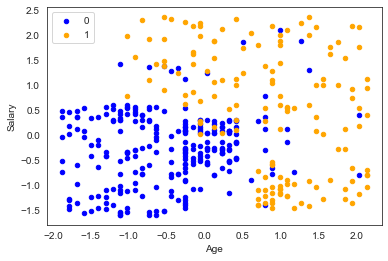

In [111]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X_scaled[:,0], y=X_scaled[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [70]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [127]:
cost_array = []

In [71]:
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

In [72]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

In [73]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred) #w.r.t 0
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0]) #w.r.t 1
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1]) #w.r.t 2
    return g

In [128]:
def descent(w_new, w_prev, lr): #updates the weights
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        cost_array.append(cost(w_new,X,Y))
        
        if j>10000: 
            return w_new
        j+=1

In [124]:
w=[1,1,1]

In [125]:
w = descent(w,w,0.00001)

[1, 1, 1]
271.9181916064819
[0.9987692751025375, 1.000457535929775, 1.000024417501673]
271.74579419677355
[0.9975394323903668, 1.0009146364122699, 1.0000486275192961]
271.5736545875874
[0.9963104712293538, 1.0013713020402246, 1.000072630538108]
271.4017723645686
[0.995082390985496, 1.0018275334057902, 1.0000964270425035]
271.23014711400435
[0.9938551910249245, 1.0022833311005286, 1.0001200175160332]
271.05877842281996
[0.9926288707139053, 1.0027386957154114, 1.0001434024414055]
270.88766587858066
[0.9914034294188412, 1.003193627840819, 1.000166582300487]
270.7168090694895
[0.9901788665062736, 1.0036481280665392, 1.0001895575743036]
270.54620758438887
[0.9889551813428844, 1.004102196981768, 1.0002123287430411]
270.37586101275826
[0.9877323732954972, 1.0045558351751067, 1.0002348962860466]
270.2057689447137
[0.9865104417310794, 1.0050090432345624, 1.0002572606818287]
270.0359309710082
[0.9852893860167437, 1.0054618217475464, 1.0002794224080593]
269.86634668303094
[0.9840692055197496, 1.0

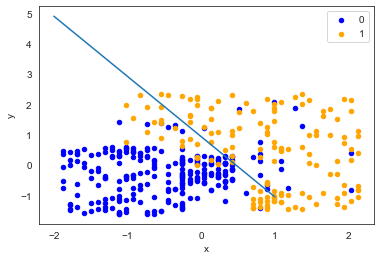

In [126]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X_scaled[:,0], y=X_scaled[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-2,2))
plt.show()

In [129]:
num_iter = list(range(0,len(cost_array)))
plt.figure(figsize = (10,8))
plt.title("cost function vs iterations")

plt.xlabel("iterations")
plt.ylabel("cost")
plt.plot(num_iter,cost_array)
plt.show